In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skewnorm
from scipy.stats import norm

import numpy as np
import pickle

import sys
sys.path.append("../")

from utils import gather_data

%load_ext autoreload
%autoreload 2

In [2]:
"""
    Load the ND data, 
    which we want to analyze
"""  

# Point this path to your data

path = "../data/smooth_k_filtered/20190728-185653-236bf935-b1a4-11e9-8919-acde48001122/out"
W = gather_data(path, "width")

W        = W[0,:,:,:]
log_mean = np.mean(np.log(W), axis=2).T
log_std  = np.std(np.log(W), axis=2).T

In [3]:
ms = np.array([5], dtype="int")
ks = np.concatenate(
    [[2.0],
     (2 + (2**(np.arange(0, 13.5, 0.5)) / 10000)),
     [3.0],
     (3 + (2**(np.arange(0, 13.5, 0.5)) / 10000)),
     [4.0]])

In [4]:
# Use this output in the .sh file
print(' '.join("{}".format(x) for x in ks))

2.0 2.0001 2.00014142136 2.0002 2.00028284271 2.0004 2.00056568542 2.0008 2.00113137085 2.0016 2.0022627417 2.0032 2.0045254834 2.0064 2.0090509668 2.0128 2.0181019336 2.0256 2.0362038672 2.0512 2.07240773439 2.1024 2.14481546879 2.2048 2.28963093757 2.4096 2.57926187515 2.8192 3.0 3.0001 3.00014142136 3.0002 3.00028284271 3.0004 3.00056568542 3.0008 3.00113137085 3.0016 3.0022627417 3.0032 3.0045254834 3.0064 3.0090509668 3.0128 3.0181019336 3.0256 3.0362038672 3.0512 3.07240773439 3.1024 3.14481546879 3.2048 3.28963093757 3.4096 3.57926187515 3.8192 4.0


/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


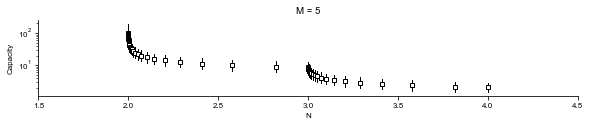

In [5]:
plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})

fig, axes = plt.subplots(figsize=(8., 1.55), ncols=len(ms), sharey=False,  tight_layout = {"pad": 0})


(axes 
 if len(ms) == 1
 else axes[0]).set_ylabel("Capacity")

for i in range(len(ms)):
    if len(ms) == 1:
        ax = axes
    else:
        ax = axes[i]

    ax.set_title("M = {}".format(ms[i]))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("N")
    ax.set_yscale("log")

    ax.set_xlim(ks[0] - 0.5, ks[-1] + 0.5)

    m  = ms[i]
    m_ = i
    
    valid = np.where(ks/2 <= m)[0] 
    a = np.exp(log_mean - 1*log_std)[valid,m_]
    b = np.exp(log_mean)[valid,m_]
    c = np.exp(log_mean + 1*log_std)[valid,m_]
            
    ax.plot([ks[valid],ks[valid]] ,[a,c], linewidth=1.,color="black",linestyle="-", alpha=1.)
    ax.plot(ks[valid], b, marker="s", color="black", markerfacecolor= "white",markersize=4,linewidth=1., linestyle="none")
    

plt.savefig("../Figures/Smooth_Varying_Dimension.pdf", dpi=300, transparent=False)